<h3>Previsão Regressiva dos Preços das Casas em Boston (Boston House Prices DataSet/1978)</h3>
<p>Descrição das colunas:</p>
<ul>
    <li><b>CRIM:</b> taxa de criminalidade per capita por distrito/região.</li>
    <li><b>ZN:</b> proporção de terrenos residenciais zoneados para lotes acima de 25000 pés quadrados.</li>
    <li><b>INDUS:</b> proporção de acres de negócios não varejistas por distrito/região.</li>
    <li><b>CHAS:</b> proximidade com o Rio Charles River.</li>
    <li><b>NOX:</b> concentração de óxidos nítricos (partes por 10 milhões).</li>
    <li><b>RM:</b> número médio de quartos por habitação.</li>
    <li><b>AGE:</b> proporção de unidades ocupadas pelos proprietários construídas antes de 1940.</li>
    <li><b>DIS:</b> distâncias ponderadas para cinco centros de emprego de Boston.</li>
    <li><b>RAD:</b> índice de acessibilidade às rodovias radiais.</li>
    <li><b>TAX:</b> taxa de imposto por propriedade.</li>
    <li><b>PTRATIO:</b> relação aluno-professor por distrito/região.</li>
    <li><b>B:</b> proporção de negros por cidade a cada 1000 habitantes.</li>
    <li><b>LSTAT:</b> proporção da população com baixo status financeiro.</li>
    <li><b>MEDV:</b> valor médio das casas ocupadas pelos proprietários em $ 1000.</li>
</ul>

<h4>Exploração dos Dados</h4>

In [2]:
url_path = 'boston.csv'
from Neuraline.Utilities.data import DataTable, DataExploration
data_table, data_exploration = DataTable(), DataExploration()
data_table.visualization_csv_inline(url_path=url_path, limit=5)

╒═════════╤══════╤═════════╤════════╤═══════╤═══════╤═══════╤════════╤═══════╤═══════╤═══════════╤════════╤═════════╤════════╕
│    CRIM │   ZN │   INDUS │   CHAS │   NOX │    RM │   AGE │    DIS │   RAD │   TAX │   PTRATIO │      B │   LSTAT │   MEDV │
╞═════════╪══════╪═════════╪════════╪═══════╪═══════╪═══════╪════════╪═══════╪═══════╪═══════════╪════════╪═════════╪════════╡
│ 0.00632 │   18 │    2.31 │      0 │ 0.538 │ 6.575 │  65.2 │ 4.09   │     1 │   296 │      15.3 │ 396.9  │    4.98 │   24   │
├─────────┼──────┼─────────┼────────┼───────┼───────┼───────┼────────┼───────┼───────┼───────────┼────────┼─────────┼────────┤
│ 0.02731 │    0 │    7.07 │      0 │ 0.469 │ 6.421 │  78.9 │ 4.9671 │     2 │   242 │      17.8 │ 396.9  │    9.14 │   21.6 │
├─────────┼──────┼─────────┼────────┼───────┼───────┼───────┼────────┼───────┼───────┼───────────┼────────┼─────────┼────────┤
│ 0.02729 │    0 │    7.07 │      0 │ 0.469 │ 7.185 │  61.1 │ 4.9671 │     2 │   242 │      17.8 │ 392.83 │    

True

<h4>Separação dos Dados em Treinamento e Teste com o Treinamento Executado na Sequência</h4>

In [9]:
list_inputs, list_outputs = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'], ['MEDV']
inputs_train, outputs_train, inputs_test, outputs_test = data_exploration.dataSeparationCSV(url_path=url_path, list_inputs=list_inputs, list_outputs=list_outputs, training_percentage=.8, separator=',')
from Neuraline.ArtificialIntelligence.DeepLearning.neural_network import NeuralNetwork
neural_network = NeuralNetwork()
neural_network.fit(inputs=inputs_train, outputs=outputs_train, epochs=5, activation_function='nonlinear', show_error=True)

epoch...............................: 1 - loss: 0.80000000
epoch...............................: 2 - loss: 0.60000000
epoch...............................: 3 - loss: 0.40000000
epoch...............................: 4 - loss: 0.20000000
epoch...............................: 5 - loss: 0.00000000


True

<h4>Teste do Modelo</h4>

In [10]:
result_test = neural_network.test(inputs=inputs_test, outputs=outputs_test)
result_test

{'assertiveness': 0.80749579883069, 'error': 0.19250420116931}

<h4>Visualização Gráfica do Teste</h4>

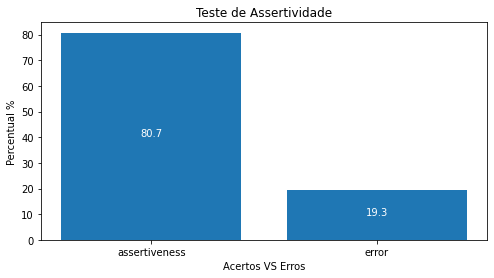

In [11]:
from Neuraline.Utilities.chart import Chart
chart = Chart()
x, y = list(result_test.keys()), [y*100 for y in list(result_test.values())]
chart.plotBAR(x=x, y=y, x_label='Acertos VS Erros', y_label='Percentual %', title='Teste de Assertividade', bar_values=True)